<h1 style="text-align: center;">Credit Card Fraud Detection using Machine Learning</h1>

<h2 style="text-align: center;">Introduction<h2>

<p> Credit card fraud detection is an application of machine learning in the finance sector. It is important for credit card companies to be able to identify fraudulent transactions to ensure that cuatomers are not charged for items they did not purchase. Effective fraud detection helps protect both the financial institution and its customers from significant financial losses. The dataset used for this project contains transactions paid with credit cards. Fraudulent cases are rare, hence, the dataset is highly imbalanced which makes it difficult to build accurate predictive models. This notebook outlines the method for detecting credit card fraud and handling data imbalance using machine learning techniques.</p>


<h2 style="text-align: center;">Aims and Objectives<h2>



1. To detect fraudulent credit card transactions using machine learning techniques.
2. To address the data imbalance in the dataset to improve the accuracy of the models
3. To compare and evaluate the performance of different machine learning models using different evaluation metrics

<h2 style="text-align: center;">Methodology<h2>

<h3>Dataset</h3>

<p>The dataset contains transactions that occurred within 2 days paid with credit cards in September 2013 by European cardholders. There are 492 fraudulent transactions out of 284,807 transactions, so the dataset is significantly imbalanced.</p>
<p> It contains only numerical input variables and for privacy V1 - v28 were tranformed with PCA. . Class is the fraud status, 0 is for normal transactions while 1 is for fraudulent transactions
</p>



<h3 style="text-align: center;">Import Neccessary Libraries</h3>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 99% 65.0M/66.0M [00:00<00:00, 86.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 76.0MB/s]


In [ ]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<h3 style="text-align: center;">Data Preprocessing</h3>


1. Read in the creditcard.csv dataset
2. Detect and handle null values
3. Detect and remove duplicated data
4. Normalize the features in the Time and Amount column with standard scaler to ensure they are on the same scale with the other variables
5. Spilt the features and the target variable for model training and testing

In [ ]:
# Reading creditcard.csv into a pandas dataframe
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Prints the shape of the dataframe
df.shape

(284807, 31)

In [ ]:
# Prints the dataframe's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Prints the amount of null values in each column of the data frame
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


. There are no null values present in this dataset

In [ ]:
# Check for duplicated values
df.duplicated().any()

True

In [ ]:
# Prints sum of duplicated values
df.duplicated().sum()

1081

In [ ]:
# drop rows with duplicated values
df = df.drop_duplicates()

In [ ]:
# Prints the shape of the new dataframe
df.shape

(283726, 31)

In [ ]:
# Normalize the values in the Amount and Time column using standardscaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

<ipython-input-43-09cfb04de05e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
<ipython-input-43-09cfb04de05e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))


In [ ]:
# Prints the new dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [ ]:
# Spilt the features (independent variables) and target variable (dependent variable)
x = df.drop(['Class'], axis = 1)
y = df['Class']

<h3 style="text-align: center;">Data Visualization</h3>



1. Plot the distribution of normal and fraudulent transactions with seaborn

In [ ]:
# Print the unique values in class column
df['Class'].unique()

array([0, 1])

In [ ]:
# Print the value count for the class column
df['Class'].value_counts()

,count
Class,
0,283253
1,473


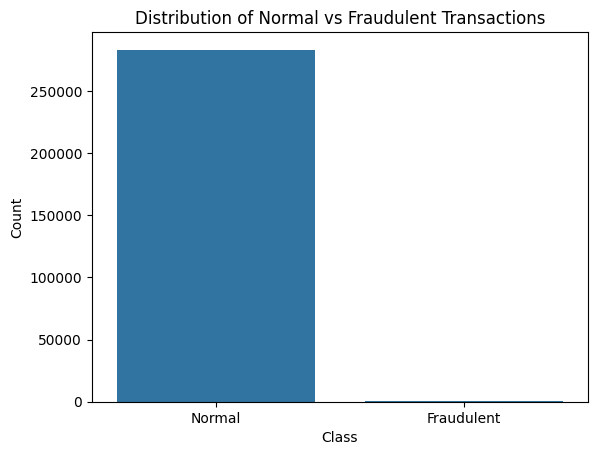

In [ ]:
# Plot the distribution of normal vs fraudulent transactions
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.xticks([0, 1], ['Normal', 'Fraudulent'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h3 style="text-align: center;">Handling Class Imbalance</h3

<h4 style="text-align: center;">Under Sampling</h4>

<p> This method randomly remove samples from the majority class to balance the class distribution </p>

In [ ]:
# Initialize RandomUnderSampler
RUS = RandomUnderSampler(random_state = 42)

In [ ]:
# Apply RandomUnderSampler

x_under_sampled, y_under_sampled = RUS.fit_resample(x, y)

In [ ]:
# Convert the resampled arrays back to a dataframe and series
x_under_sampled = pd.DataFrame(x_under_sampled, columns = x.columns)
y_under_sampled = pd.Series(y_under_sampled, name = 'Class')

In [ ]:
# Print the value_count of the under_sampled series
y_under_sampled.value_counts()

,count
Class,
0,473
1,473


In [ ]:
# Spilt the data into the training and testing set using train_test_spilt
x_train, x_test, y_train, y_test = train_test_split(x_under_sampled, y_under_sampled, test_size = 0.2, random_state = 42)

In [ ]:
# Define a function to create a dictionary of various machine learning models
def get_models():

        # Define an empty dictionary to hold the machine learning models
        models = dict()

        models['Decision_Tree'] = DecisionTreeClassifier()
        models['Logistic_Regression'] = LogisticRegression()
        models['Random_Forest'] = RandomForestClassifier()
        models['XGBoost'] = XGBClassifier()

        # Return the dictionary containing all the models
        return models

In [ ]:
# Function to train the models and display the classification report, confusion matrix and ROC curve
def evaluate_models(x_train, y_train, x_test, y_test):
    models = get_models()

    for name, model in models.items():

        # Fit the model on the training data
        model.fit(x_train, y_train)

        # Predict on the test data
        y_pred = model.predict(x_test)

        # Get the predicted probabilities for the positive class (fraud)
        y_probs = model.predict_proba(x_test)[:, 1]

        # Calculate ROC-AUC score
        roc_auc = roc_auc_score(y_test, y_probs)

        labels = ['Normal', 'Fraud']

        # Printing the classification report
        print(f'Model: {name}')
        print('Classification Report:')
        print(classification_report(y_test, y_pred, target_names = labels))

        # Print confusion matrix
        cnn_cm = confusion_matrix(y_test, y_pred,)

        plt.figure(figsize = (10, 8))

        sns.heatmap(cnn_cm, annot = True, fmt = "d", cmap = "Blues", cbar = True,  xticklabels = labels, yticklabels = labels)

        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')

        plt.show()

        # Compute the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)

        # Plot the ROC curve
        plt.figure(figsize = (10, 8))
        plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve for {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc = 'lower right')
        plt.show()

In [ ]:
# Funtion for isolation forest
def isolation_forest_model(x_tain, y_train, x_test, y_test):
        Isolation_Forest = IsolationForest(random_state = 42)

        # Fit the model on the training data
        Isolation_Forest.fit(x_train)

        # Predict the anomalies
        y_pred = Isolation_Forest.predict(x_test)

        # Convert anomalies to 1, normal to 0
        y_pred = np.where(y_pred == -1, 1, 0)

        labels = ['Normal', 'Fraud']

        # Printing the classification report
        print('Model: Isolation_Forest')
        print('Classification Report:')
        print(classification_report(y_test, y_pred, target_names = labels))

        # Print confusion matrix
        cnn_cm = confusion_matrix(y_test, y_pred,)

        plt.figure(figsize = (10, 8))

        sns.heatmap(cnn_cm, annot = True, fmt = "d", cmap = "Blues", cbar = True,  xticklabels = labels, yticklabels = labels)

        plt.title(f'Isolation_Forest Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')

        plt.show()

        # Get the anomaly scores from the Isolation Forest model
        y_scores = Isolation_Forest.decision_function(x_test)

        # Compute the AUC score
        roc_auc = roc_auc_score(y_test, y_scores)

        #  Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Curve for Isolation Forest')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc = 'lower right')
        plt.show()

Model: Decision_Tree
Classification Report:
              precision    recall  f1-score   support

      Normal       0.89      0.92      0.91        88
       Fraud       0.93      0.90      0.92       102

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



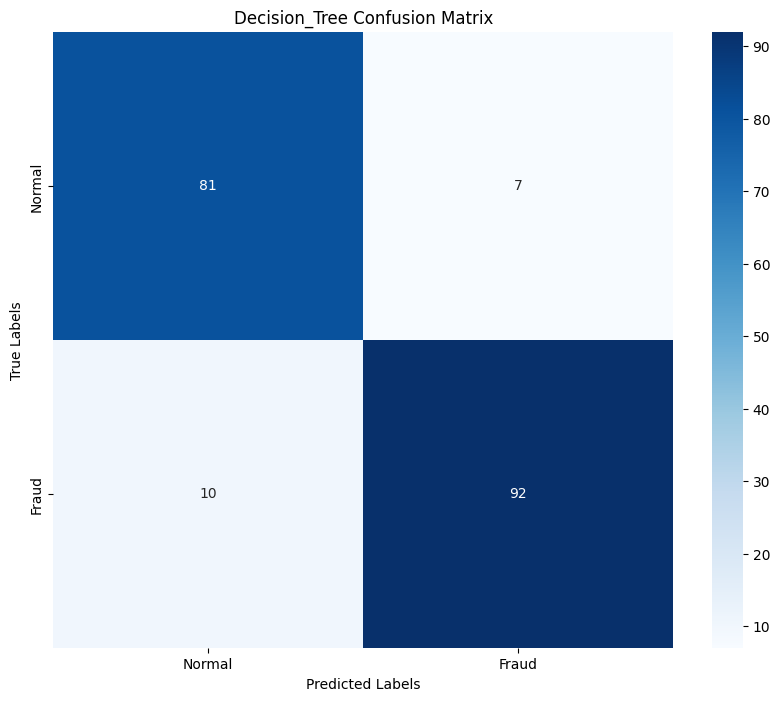

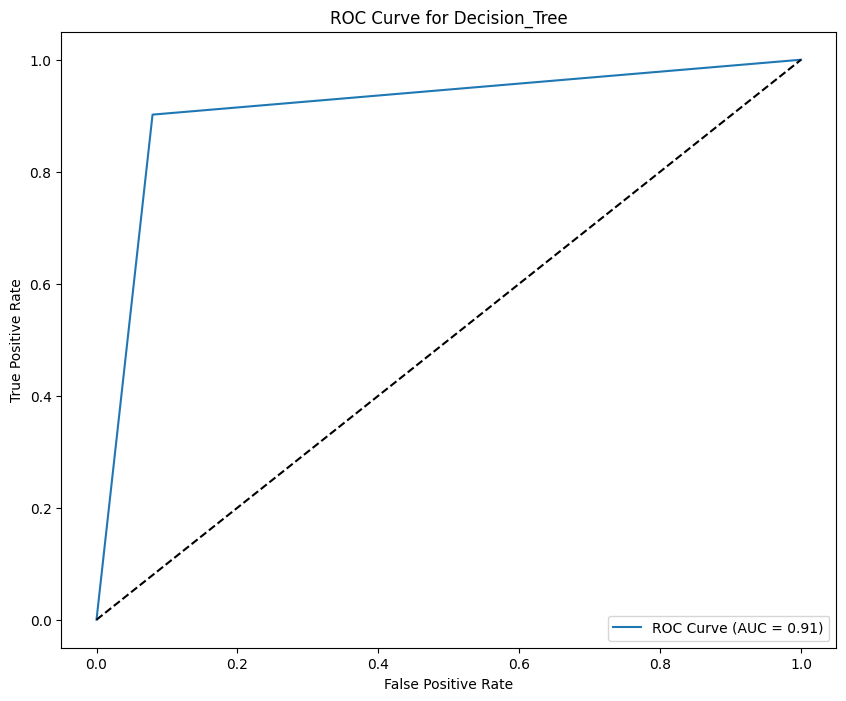

Model: Logistic_Regression
Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.95      0.93        88
       Fraud       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



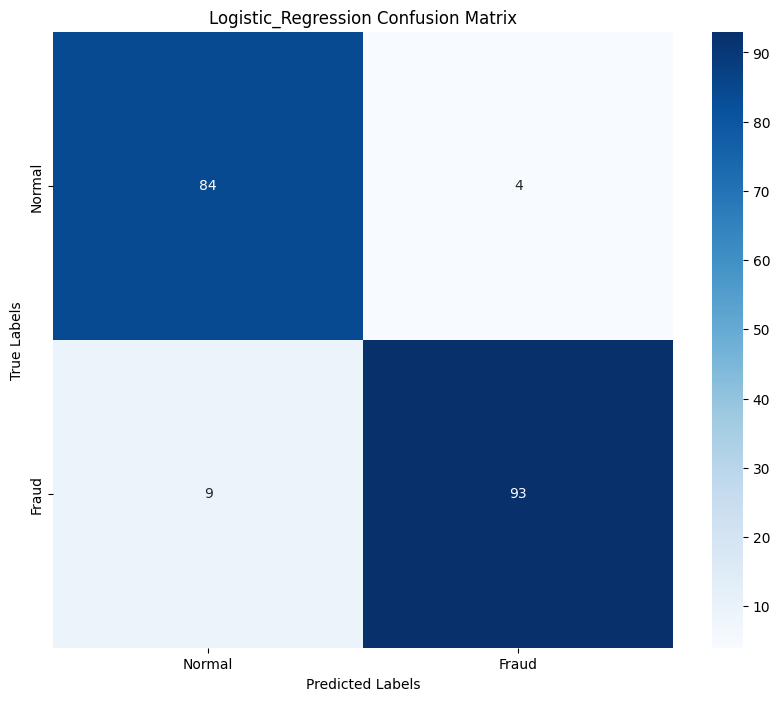

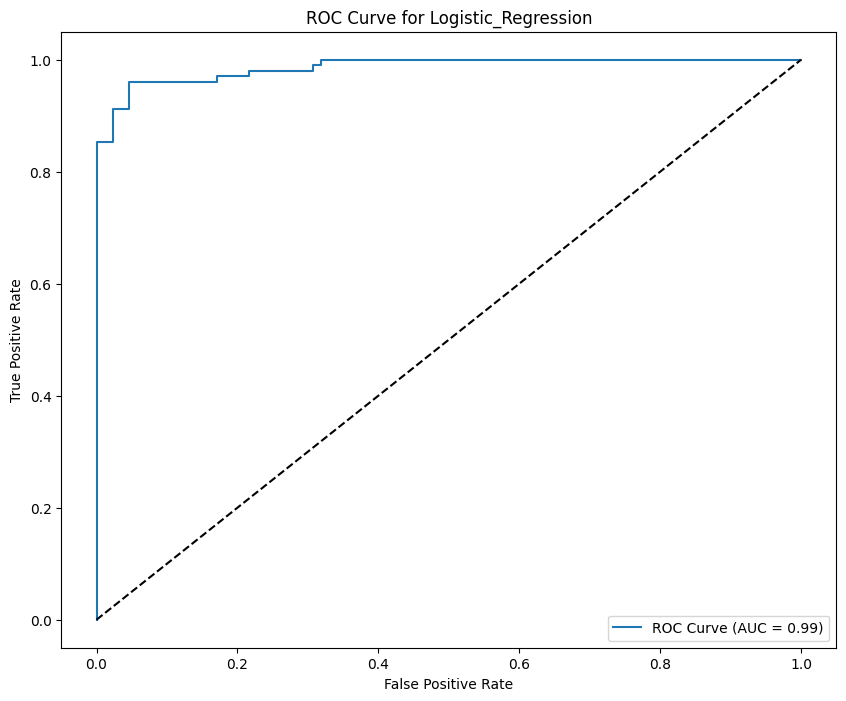

Model: Random_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.98      0.93        88
       Fraud       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



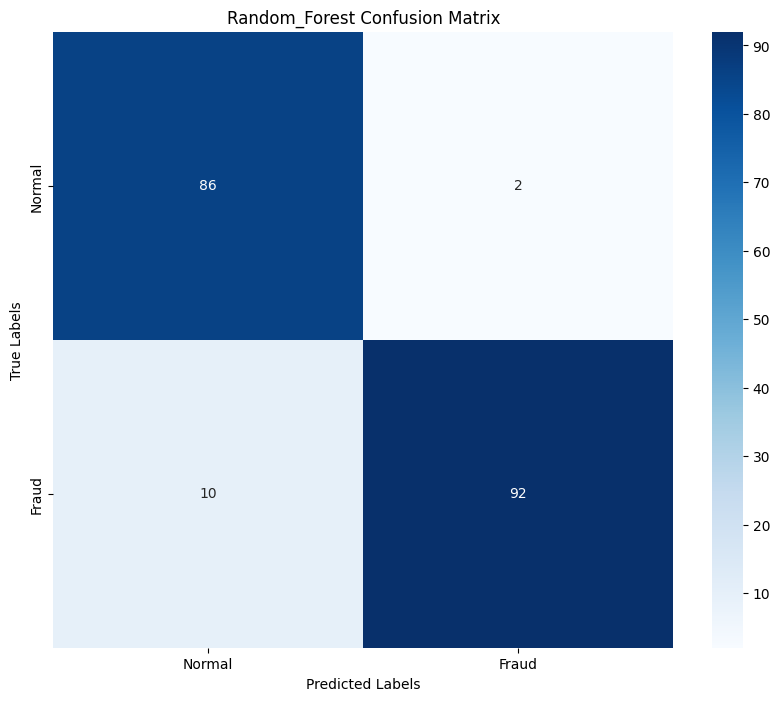

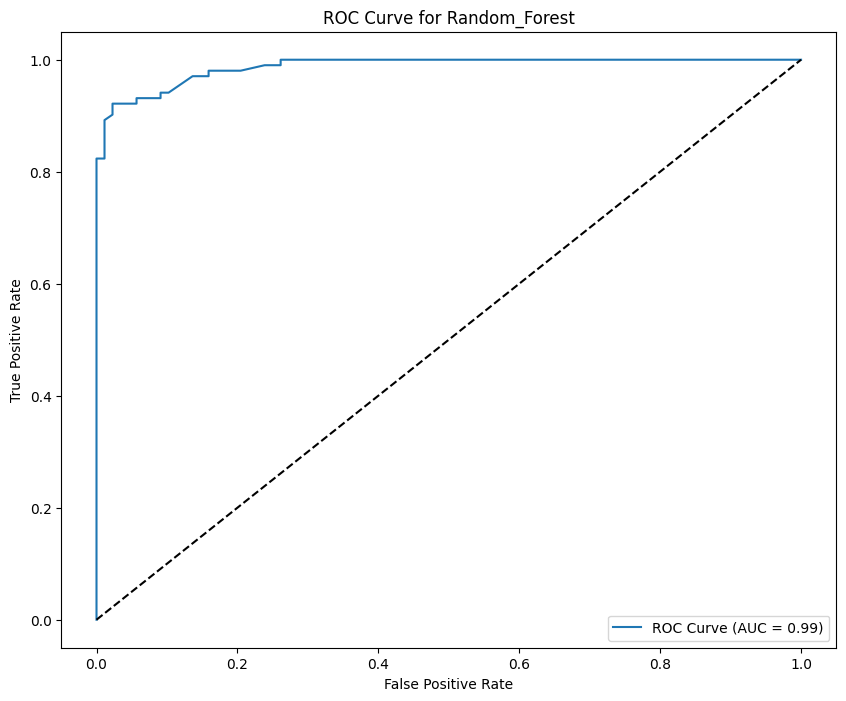

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.98      0.93        88
       Fraud       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



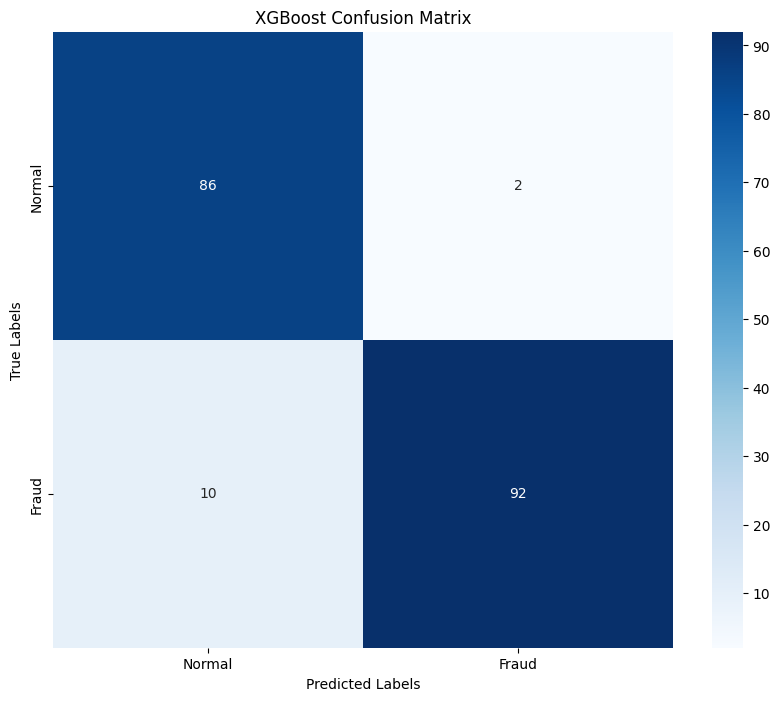

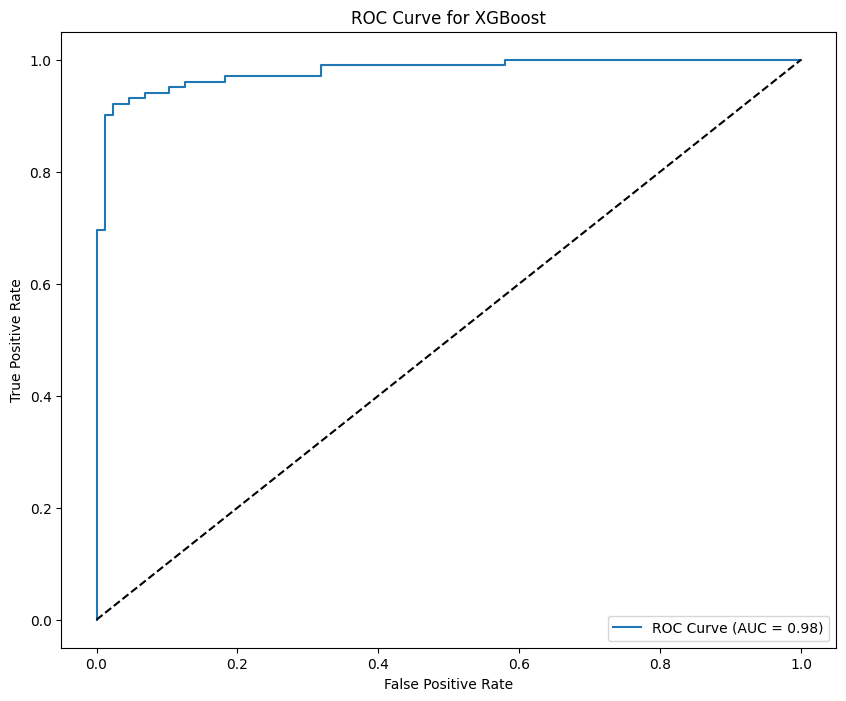

In [ ]:
# Apply the function evaluate_models to the under_sampled data
evaluate_models(x_train, y_train, x_test, y_test)

Model: Isolation_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.53      0.99      0.69        88
       Fraud       0.96      0.25      0.39       102

    accuracy                           0.59       190
   macro avg       0.75      0.62      0.54       190
weighted avg       0.76      0.59      0.53       190



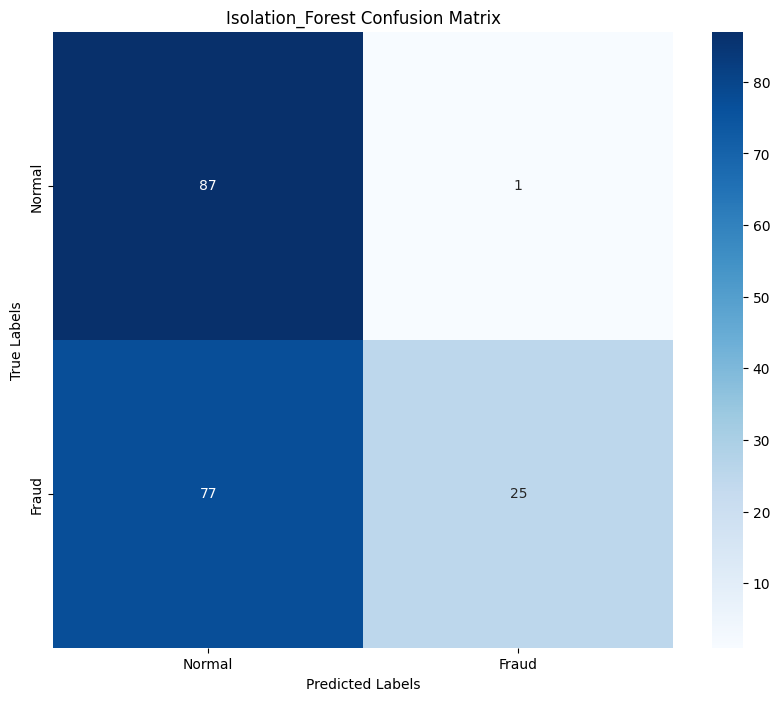

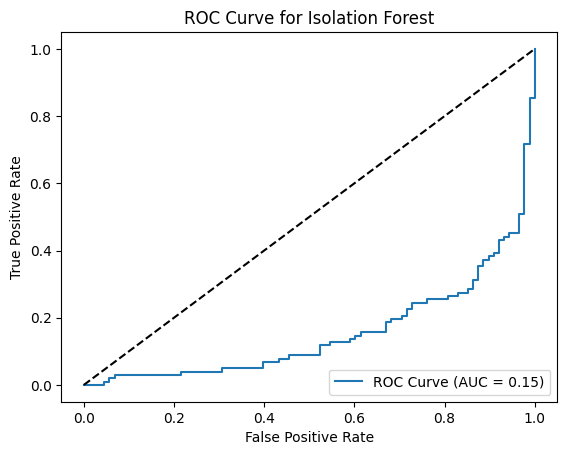

In [ ]:
isolation_forest_model(x_train, y_train, x_test, y_test)

<h3 style="text-align: center;">Over Sampling</h3>

<p>This method randomly duplicating samples from the minority class to balance the class distribution</p>

In [ ]:
# Initialize RandomOverSampler
ROS = RandomOverSampler(random_state = 42)

In [ ]:
# Apply RandomOverSampler
x_over_sampled, y_over_sampled = ROS.fit_resample(x, y)

In [ ]:
# Convert the resampled arrays back to a dataframe and series
x_over_sampled = pd.DataFrame(x_over_sampled, columns = x.columns)
y_over_sampled = pd.Series(y_over_sampled, name = 'Class')

In [ ]:
# Print the value_count of the over_sampled series
y_over_sampled.value_counts()

,count
Class,
0,283253
1,283253


In [ ]:
# Spilt the data into the training and testing set using train_test_spilt
x_train, x_test, y_train, y_test = train_test_split(x_over_sampled, y_over_sampled, test_size = 0.2, random_state = 42)

Model: Decision_Tree
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



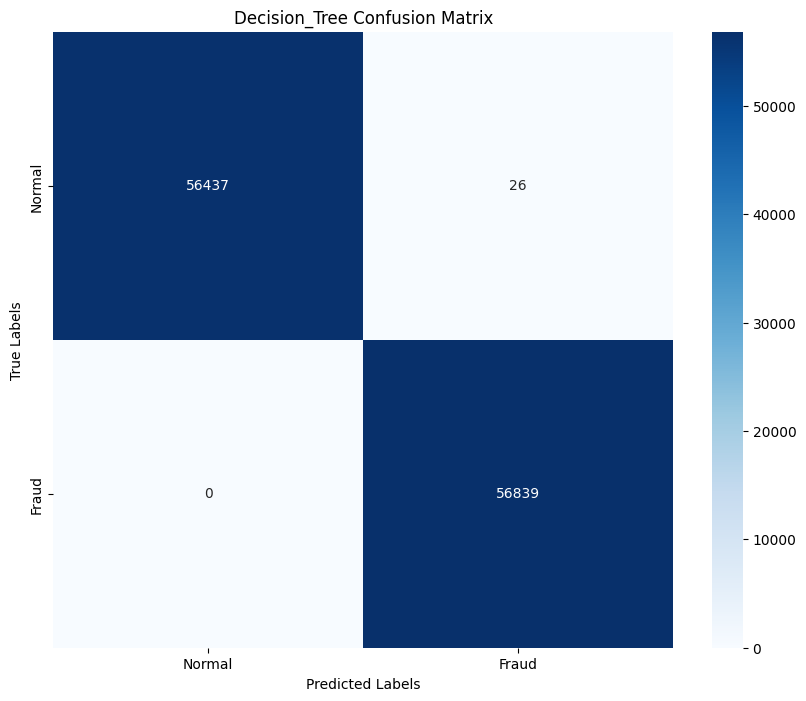

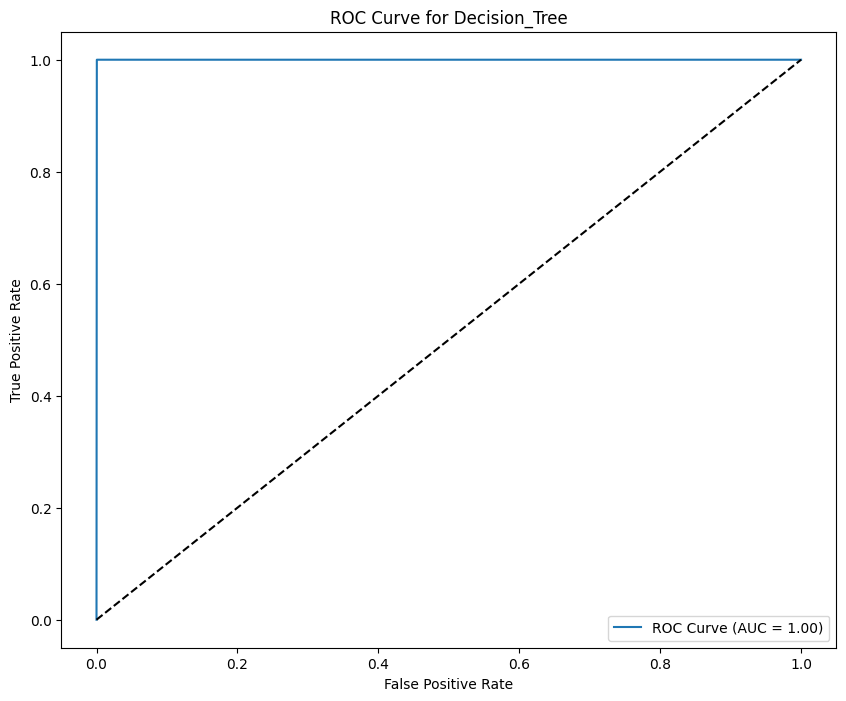

Model: Logistic_Regression
Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.98      0.95     56463
       Fraud       0.98      0.92      0.95     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



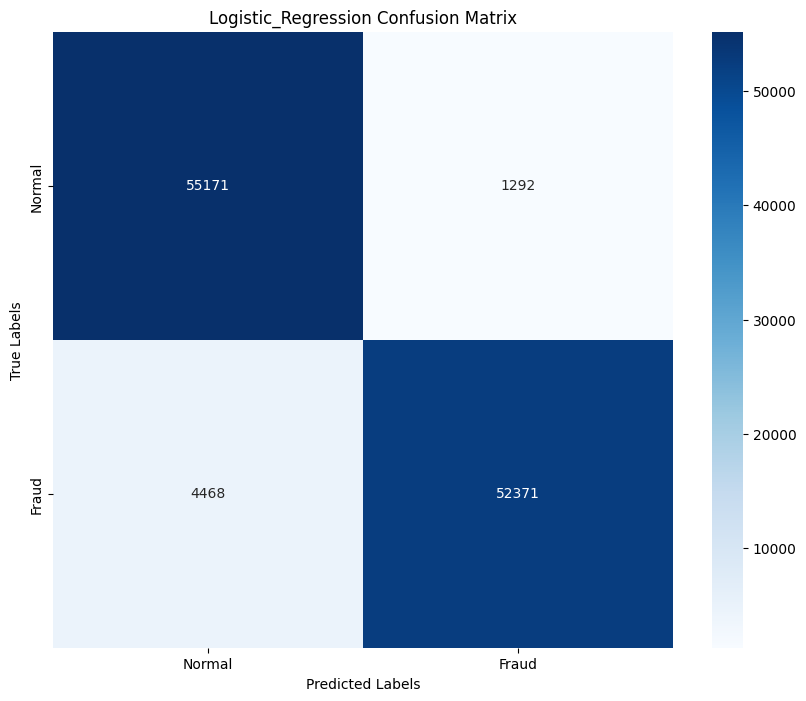

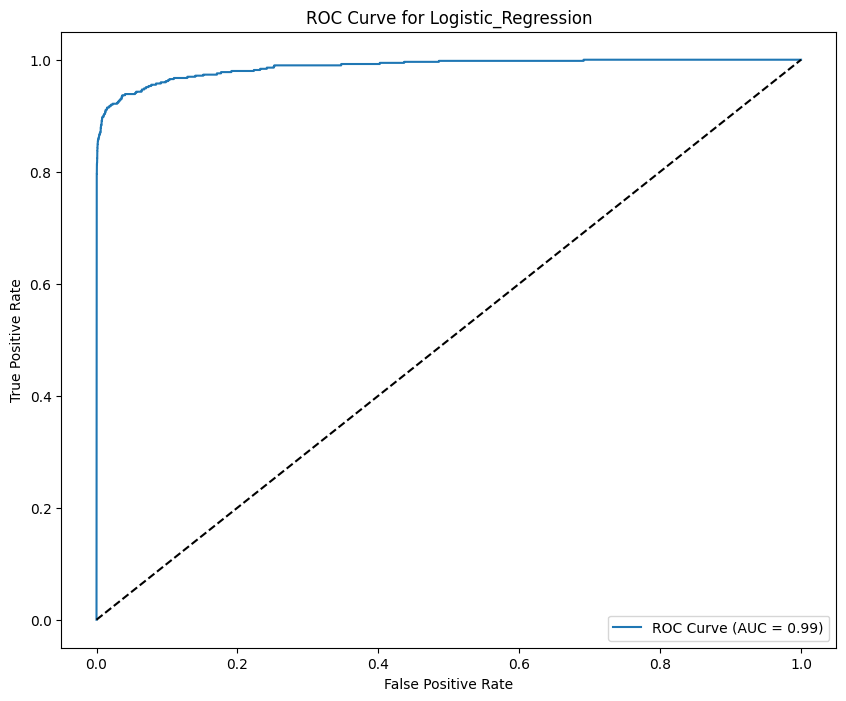

Model: Random_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



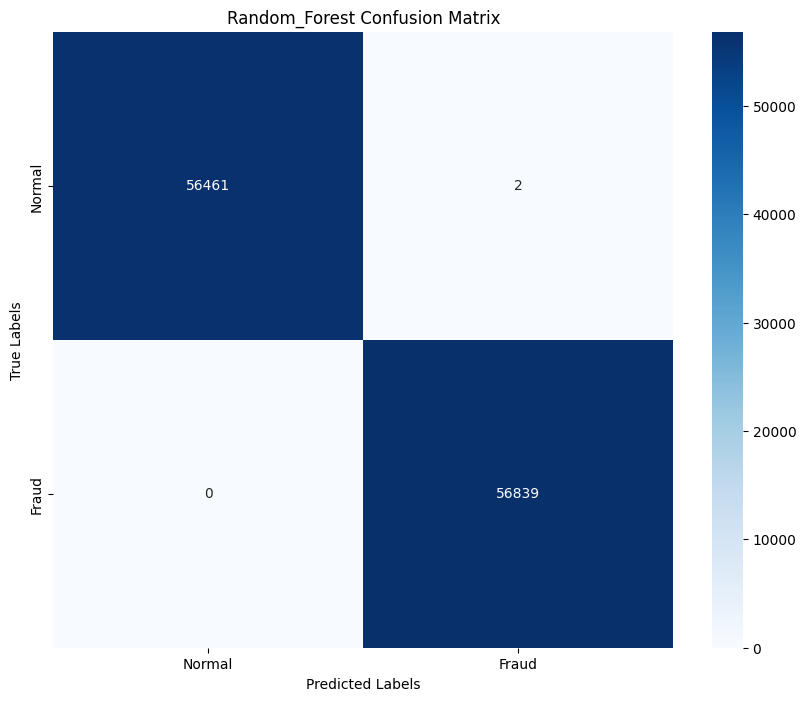

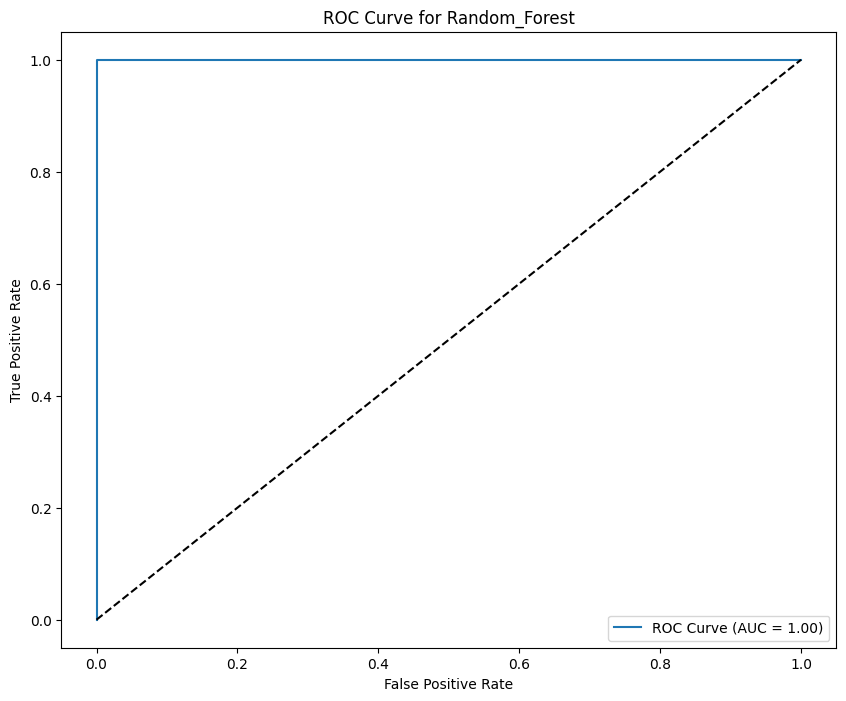

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



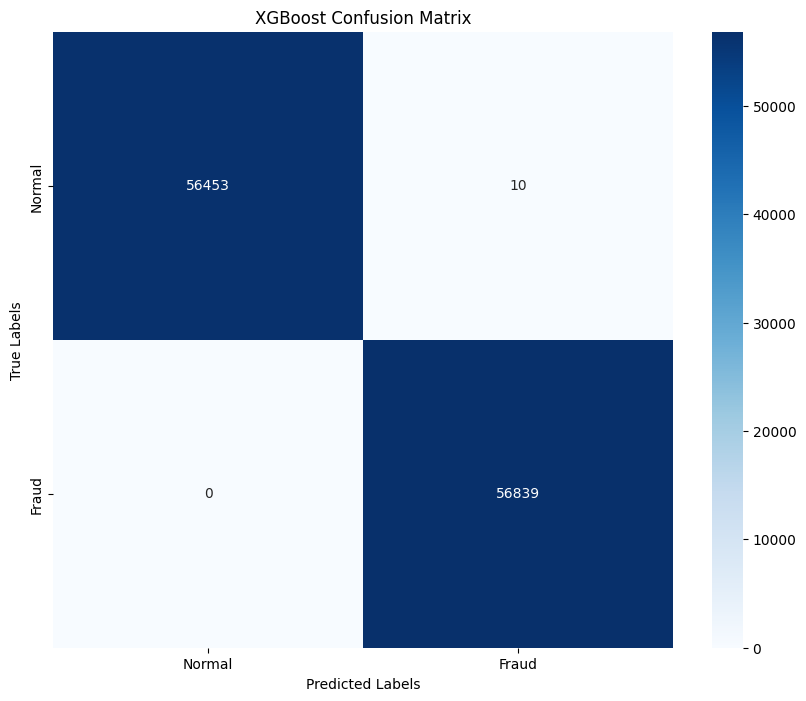

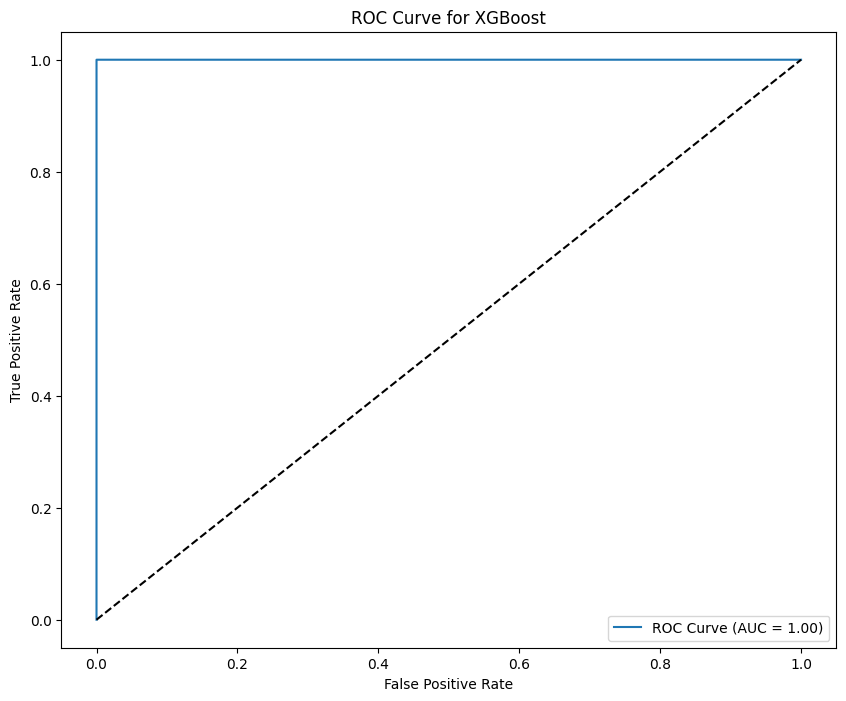

In [ ]:
# Apply the function evaluate_models to the over_sampled data
evaluate_models(x_train, y_train, x_test, y_test)

Model: Isolation_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.56      0.99      0.72     56463
       Fraud       0.96      0.24      0.38     56839

    accuracy                           0.61    113302
   macro avg       0.76      0.61      0.55    113302
weighted avg       0.76      0.61      0.55    113302



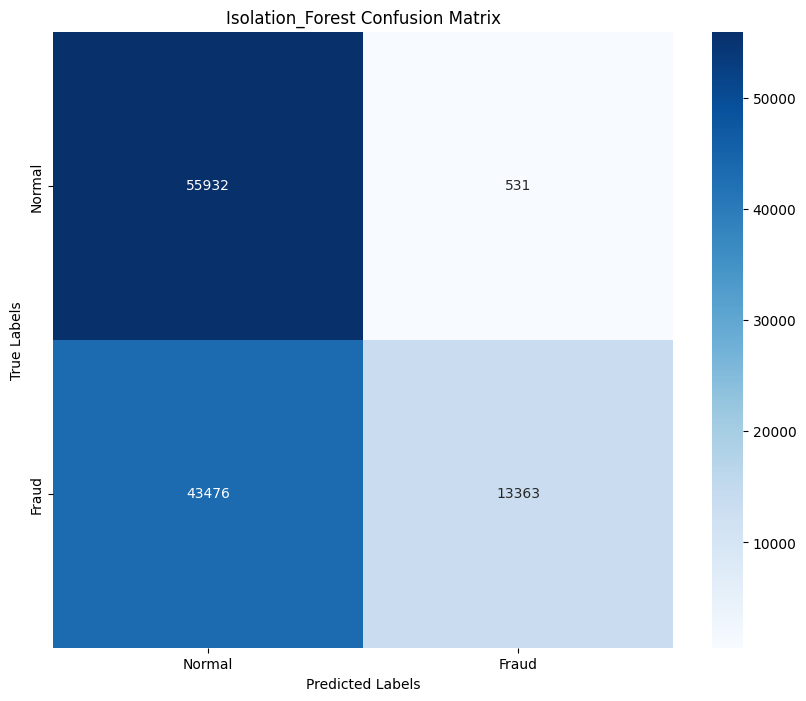

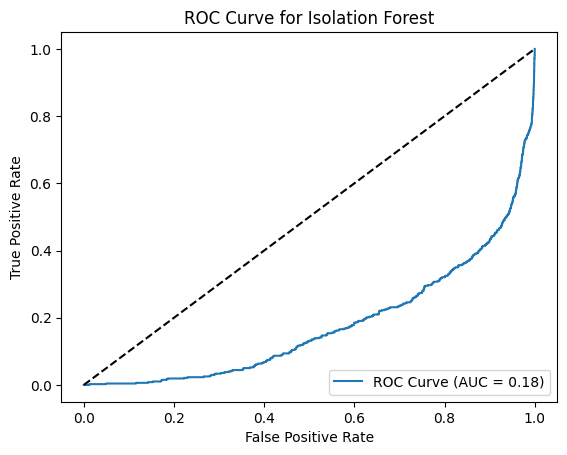

In [ ]:
isolation_forest_model(x_train, y_train, x_test, y_test)

<h3 style="text-align: center;">SMOTE (Synthetic Minority Over Sampling)</h3>

<p>This method generates synthetic samples for the minority class to balance the class imbalance</p>

In [ ]:
# Initialize SMOTE
Smote = SMOTE(random_state = 42)

In [ ]:
# Apply SMOTE
x_smote, y_smote = Smote.fit_resample(x, y)

In [ ]:
# Convert the resampled arrays back to a dataframe and series
x_smote = pd.DataFrame(x_smote, columns = x.columns)
y_smote = pd.Series(y_smote, name = 'Class')

In [ ]:
# Print the value count the smote series
y_smote.value_counts()

,count
Class,
0,283253
1,283253


In [ ]:
# Spilt the data into the training and testing set using train_test_spilt
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

Model: Decision_Tree
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



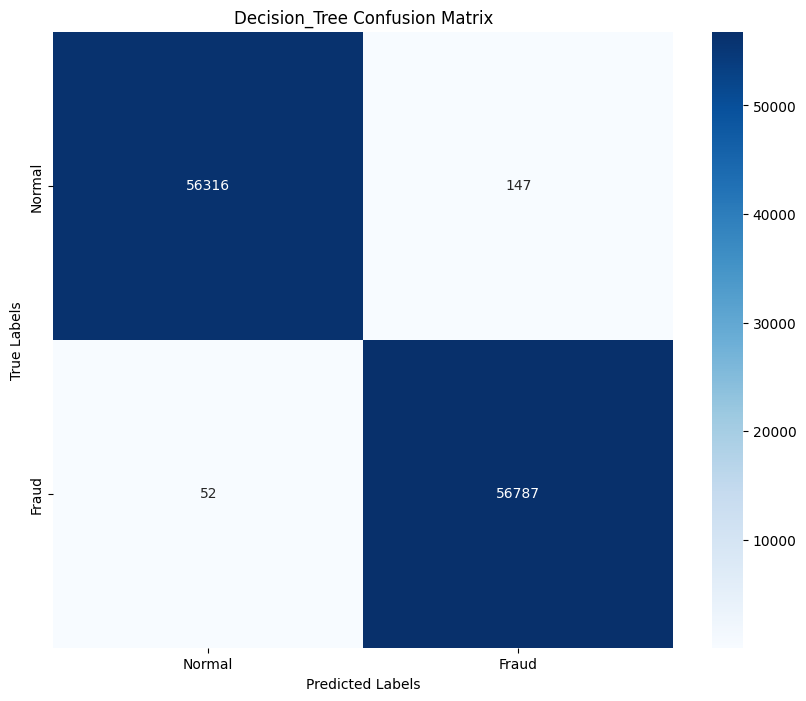

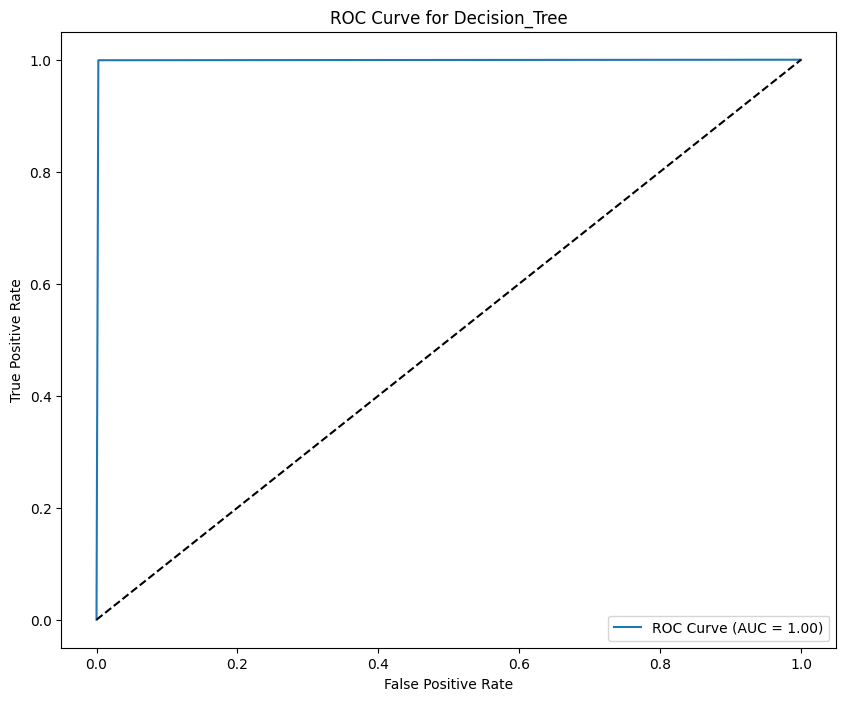

Model: Logistic_Regression
Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.97      0.95     56463
       Fraud       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



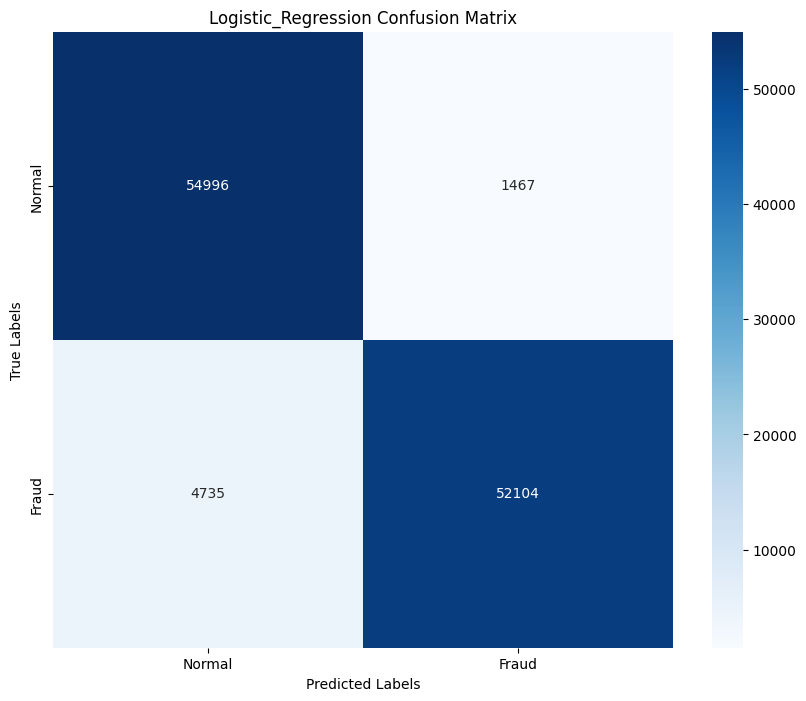

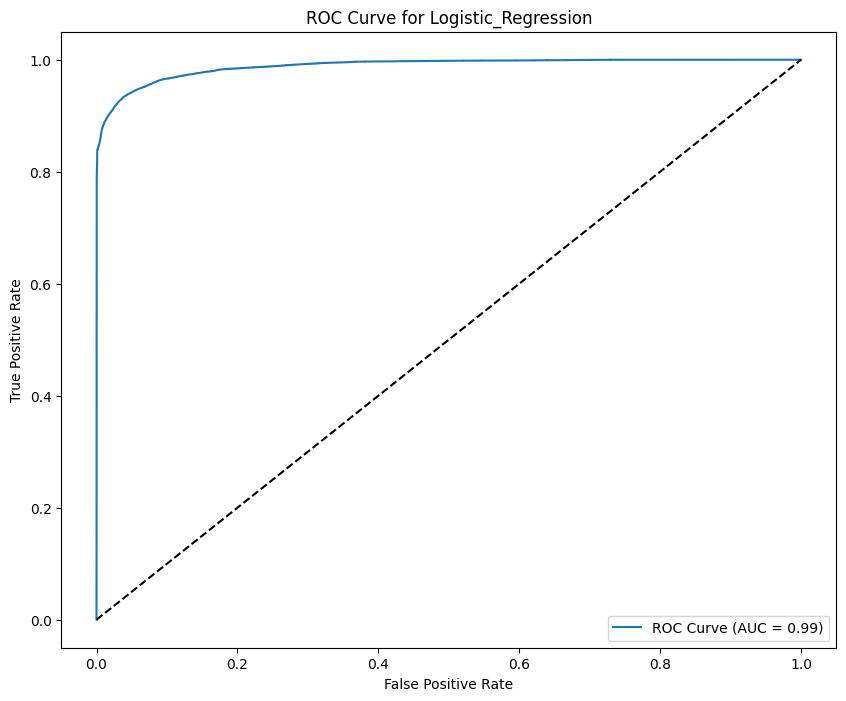

Model: Random_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



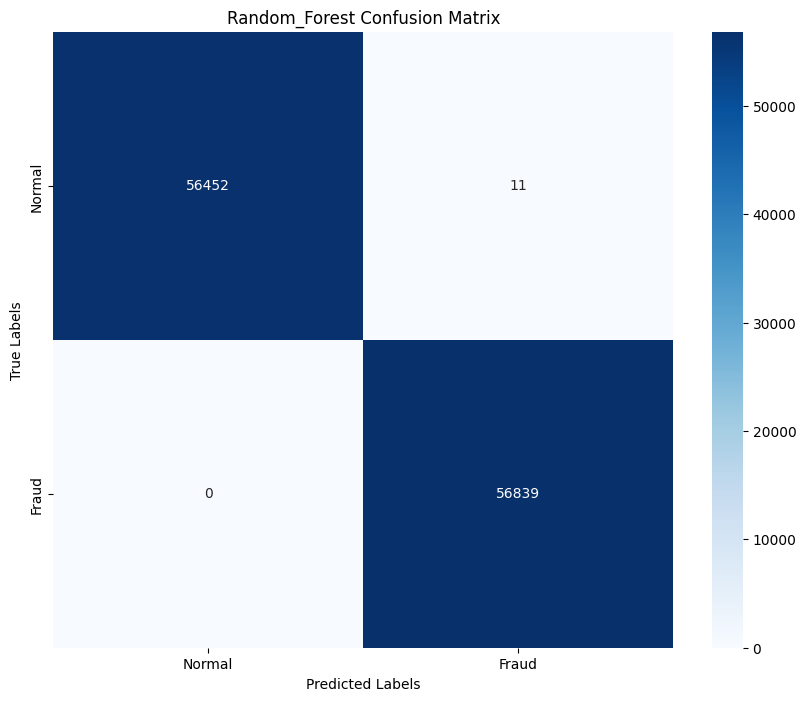

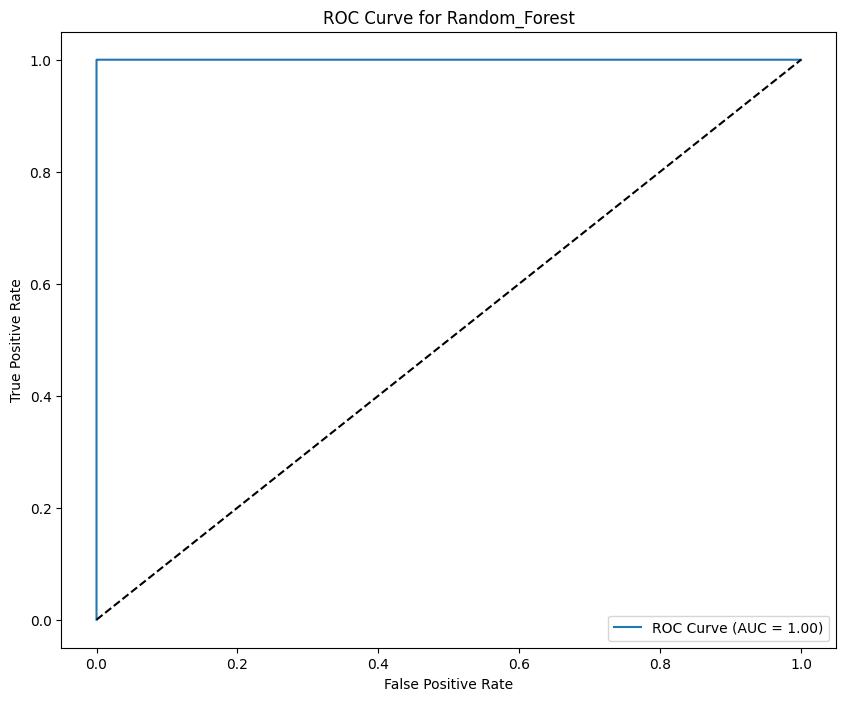

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



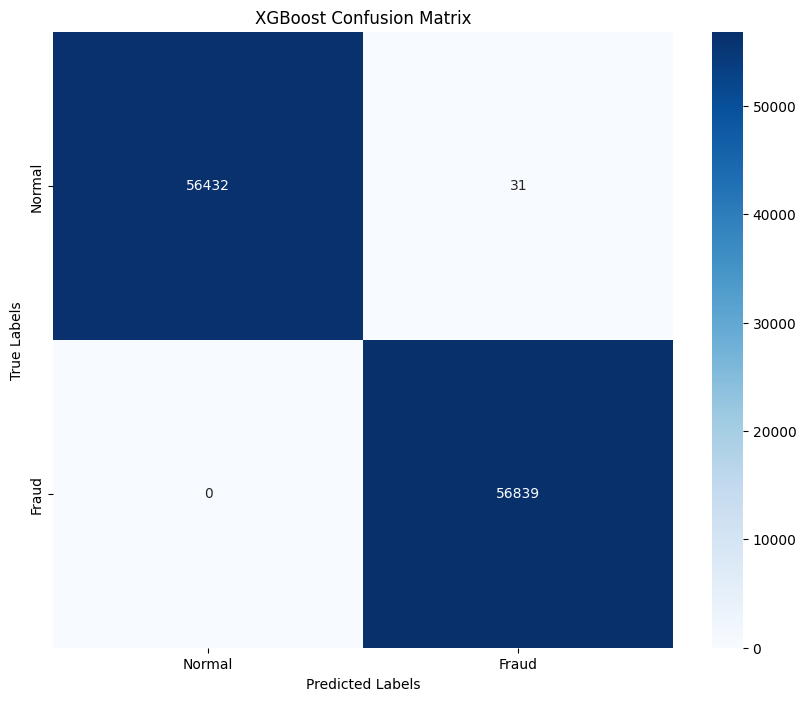

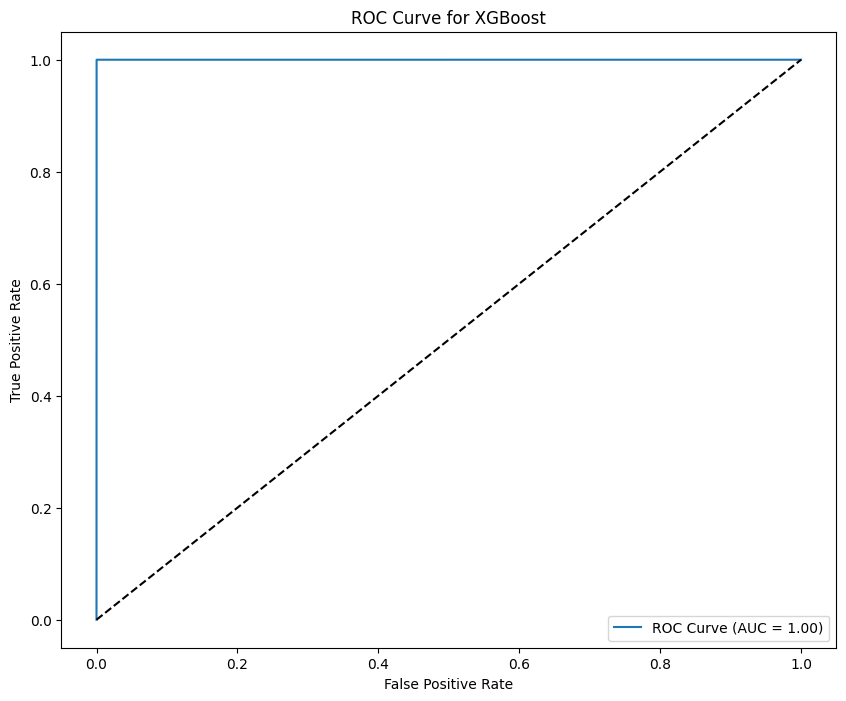

In [ ]:
# Apply the function evaluate_models to the smote data
evaluate_models(x_train, y_train, x_test, y_test)

Model: Isolation_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.56      0.99      0.71     56463
       Fraud       0.95      0.22      0.36     56839

    accuracy                           0.60    113302
   macro avg       0.75      0.60      0.53    113302
weighted avg       0.75      0.60      0.53    113302



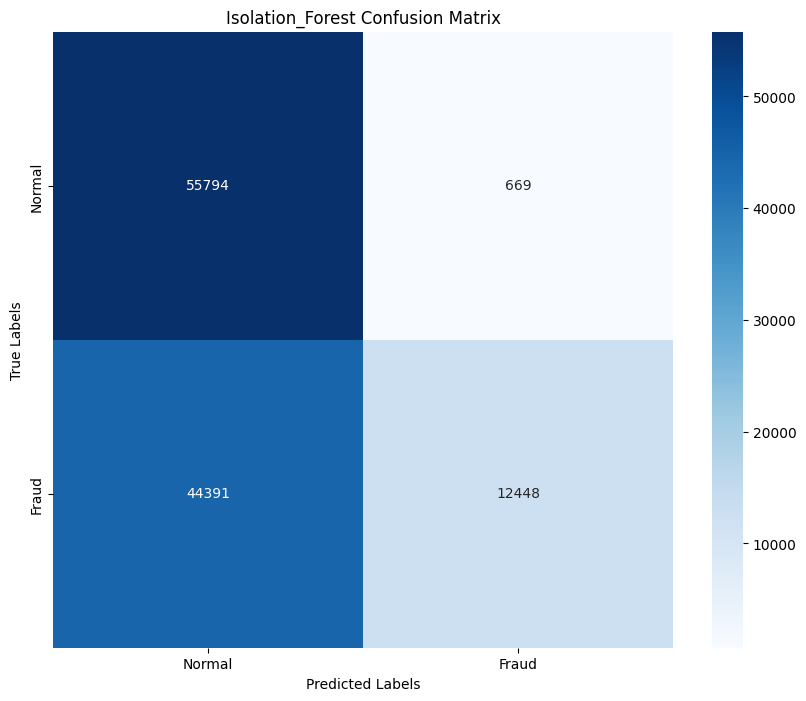

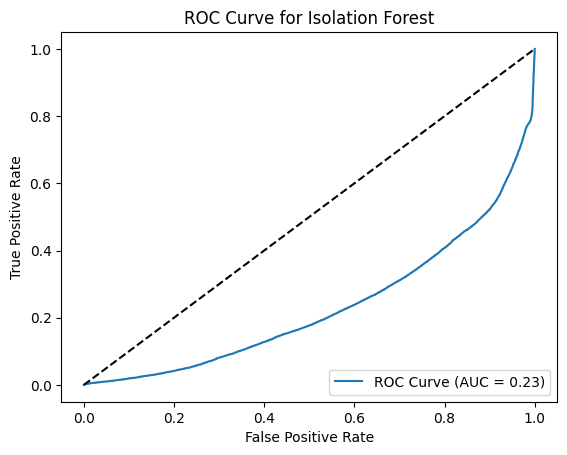

In [ ]:
isolation_forest_model(x_train, y_train, x_test, y_test)

<h2 style="text-align: center;">Conclusion<h2>

<p>A comprehensive analysis was conducted on credit card fraud detection using various machine learning techniques. The dataset used was significantly imbalanced and three different techniques - Random Under Sampling, Random, Over Sampling and Smote, were used to balance the datatset. The models used are Decision Tree, Logistic Regression, Random Forest and XGBoost, Isolation Forest was also utilized for anomaly detection.</p>
<p> The Logistic Regression model consistently exhibits high accuracy, precision, recall, F1-score, and AUC across all sampling techniques, while avoiding perfect scores. This indicates that it may generalize better without overfitting compared to the Decision Tree, Random Forest and XGBoost.</p>